In [152]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

1 - Suppose that the price of a non-dividend-paying stock is 32 dollars, implied volatility is 30%, and risk-free rate is 5% per annum.

a. Calculate the total cost of a butterfly spread strategy using European call options with strike prices of 25 dollars, 30 dollars, and 35 dollars and a maturity of one year. (Use the Black and Scholes Python code to calculate the option prices)

In [153]:
def BlackScholes(call_put, S, X, T, r, q, sigma):
    b = r - q
    d1 = (np.log(S/X) + (b + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if call_put == "c":
        price = S * np.exp(-q * T) * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    elif call_put == "p":
        price = X * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return {'Call or put': call_put, 'S': S, 'X': X, 'Time': T, 'r': r, 'q': q, 'sigma': sigma, 'price': price}

In [154]:
S = 32
Time = 1
r = 0.05
q = 0
sigma = 0.3

X_25 = BlackScholes("c", S, 25, Time, r, q, sigma)
X_30 = BlackScholes("c", S, 30, Time, r, q, sigma)
X_35 = BlackScholes("c", S, 35, Time, r, q, sigma)

print('With strike price of $25: ',round(X_25['price'],4))
print('With strike price of $30: ',round(X_30['price'],4))
print('With strike price of $35: ',round(X_35['price'],4))

total_cost_butterfly = (X_25['price'] + X_35['price'] - 2*X_30['price'])
print('Total cost will be: $', total_cost_butterfly)

With strike price of $25:  8.9176
With strike price of $30:  5.5982
With strike price of $35:  3.2797
Total cost will be: $ 1.0009096879706725


b. Plot the payoff of the strategy.

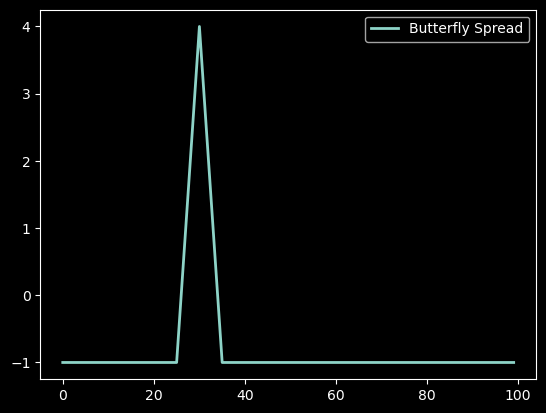

In [155]:
X = np.arange(0, 100)
call_X_25 = np.maximum(X-25, 0)
call_X_30 = np.maximum(X-30, 0)
call_X_35 = np.maximum(X-35, 0)
plt.plot(X, call_X_25+call_X_35-2*call_X_30-total_cost_butterfly, label="Butterfly Spread", linewidth=2)
plt.legend()

c. Use the Monte-Carlo method. (Decide on the number of iterations and time step by your own) Compare the price of the butterfly spread with part a.

In [156]:
now = datetime.now()
np.random.seed(int(now.timestamp()))

In [157]:
def simulate_stock_paths(init_price, Npaths, T, r, sigma, NdaysPerYr):

    dt = T / NdaysPerYr
    X = np.zeros((Npaths, NdaysPerYr + 1))
    X[:, 0] = init_price
    for t in range(1, NdaysPerYr + 1):
        Z = np.random.normal(0, 1, Npaths)
        X[:, t] = X[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return X

In [158]:
def display_paths(X, Npaths, xlab, ylab):
    
    plt.figure(figsize=(10, 6))
    for p in range(Npaths):
        plt.plot(X[p, :], linewidth=0.5)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

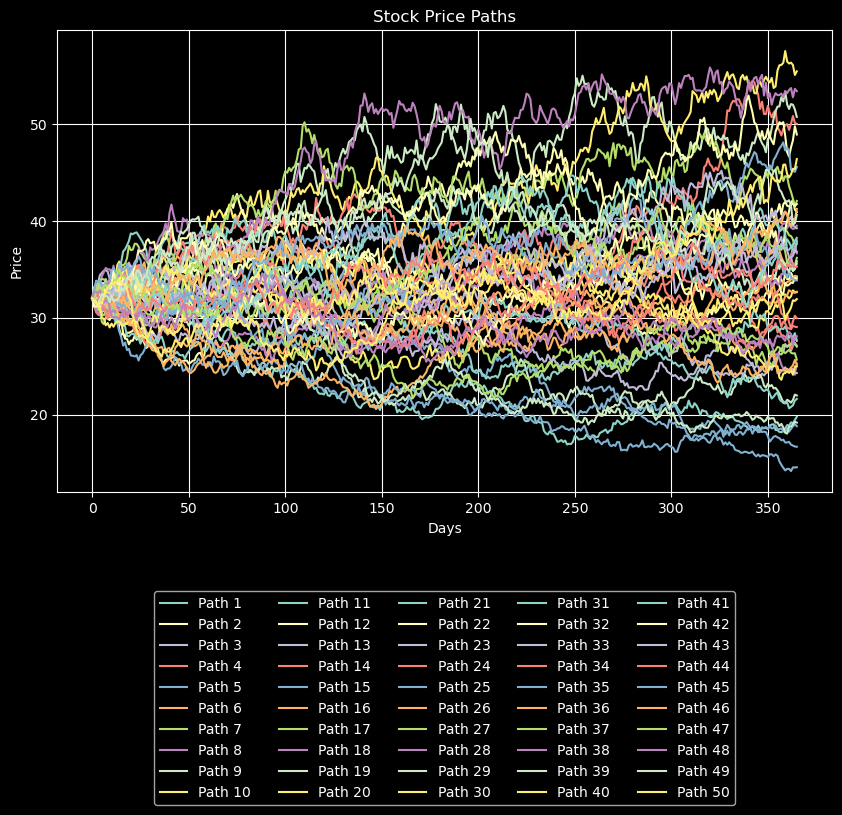

In [159]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_paths(initPrice, Npaths, Nyears, mu, sigma, NdaysPerYr):
    dt = Nyears / NdaysPerYr
    dW = np.random.normal(0, np.sqrt(dt), (Npaths, NdaysPerYr))
    time_grid = np.arange(0, Nyears + dt, dt)
    dW = np.concatenate((np.zeros((Npaths, 1)), dW), axis=1)
    X = initPrice * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * dW, axis=1))
    return X

def display_paths(paths, num_paths, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.style.use('dark_background')
    for i in range(num_paths):
        plt.plot(paths[i], label=f"Path {i+1}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Stock Price Paths")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.grid(True)  # Show grid
    plt.show()

Npaths = 1000
Nyears = 365 / 365
NdaysPerYr = 365
muA = 0.05
sigmaA = 0.30

initPrice = 32
X_paths = simulate_stock_paths(initPrice, Npaths, Nyears, muA, sigmaA, NdaysPerYr)
display_paths(X_paths, min(Npaths, 50), "Days", "Price")

In [160]:
finalPrices = X_paths[:, -1]
Strike = 25
PriceMC_25_call = np.mean(np.exp(-muA * Nyears) * np.maximum(finalPrices - Strike, 0))
print(f"Monte Carlo with strike price of $25: {round(Price_25_call,4)}")

Monte Carlo with strike price of $25: 8.7732


In [161]:
Strike = 30
PriceMC_30_call = np.mean(np.exp(-muA * Nyears) * np.maximum(finalPrices - Strike, 0))
print(f"Monte Carlo with strike price of $30: {round(PriceMC_30_call,4)}")

Monte Carlo with strike price of $30: 5.717


In [162]:
Strike = 35
PriceMC_35_call = np.mean(np.exp(-muA * Nyears) * np.maximum(finalPrices - Strike, 0))
print(f"Monte Carlo with strike price of $35: {round(PriceMC_35_call,4)}")

Monte Carlo with strike price of $35: 3.4451


In [163]:
MC_total_cost = PriceMC_25_call + PriceMC_35_call - (2 * PriceMC_30_call)

print(f"Monte Carlo: ${MC_total_cost}")
print(f"Black Scholes: ${total_cost_butterfly}")

Monte Carlo: $0.9775674218009289
Black Scholes: $1.0009096879706725


2 - Suppose you have an option portfolio with Delta 10 and Vega 200, and you want to alter your Delta and Vega exposure using 2 option contracts. The first contract has a Delta of 0.5 and Vega of 2. The second contract has Delta of 0 and Vega of 6.

d.How many of these two contracts do you need in order to balance your portfolio to Delta and Vega neutral?

In [164]:
from sympy import symbols, Eq, solve

In [165]:
portfolio_delta = 10
portfolio_vega = 200
option1_delta = 0.5
option1_vega = 2
option2_delta = 0
option2_vega = 6

option1, option2 = symbols("option1 option2")

delta = option1_delta*option1 + option2_delta*option2 + portfolio_delta
vega  = option1_vega*option1  + option2_vega*option2  + portfolio_vega

contracts_option = solve((delta, vega), (option1, option2))

contracts_option

{option1: -20.0000000000000, option2: -26.6666666666667}

Short 20 of the first contract and 26.67 of the second contract.

e.Suppose you want to achieve Delta-neutral but are willing to have a Vega exposure within ±10 range. What are the minimum number of contracts you need to get your portfolio within your target exposure range?

In [166]:
portfolio_delta = 10
portfolio_vega = 200
option1_delta = 0.5
option1_vega = 2
option2_delta = 0
option2_vega = 6
vega_lower_bound = -10
vega_upper_bound = 10

option1, option2 = symbols("option1 option2")

delta = option1_delta*option1 + option2_delta*option2 + portfolio_delta
vega_low  = option1_vega*option1  + option2_vega*option2  + portfolio_vega + vega_lower_bound
vega_up = option1_vega*option1  + option2_vega*option2  + portfolio_vega + vega_upper_bound

contracts_option1 = solve((delta, vega_low), (option1, option2))
contracts_option2 = solve((delta, vega_up), (option1, option2))

contracts_option1 , contracts_option2

({option1: -20.0000000000000, option2: -25.0000000000000},
 {option1: -20.0000000000000, option2: -28.3333333333333})

Minimum number of contracts you need to get your portfolio within your target exposure range is -28.33

3 - A put option on the S&P 500 has an exercise price of 5000 and a time to maturity of one year. The risk-free rate is 5.5% and the dividend yield on the index is 2%. The implied volatility of the index is 20% per annum and the current level of the index is 5200. A financial institution has a short position in the option.

a.Calculate the Delta and Gamma of the position. Explain how they can be interpreted.

In [167]:
import math
from scipy.stats import norm

def black_scholes_delta(S, X, T, r, q, sigma):
    d1 = (math.log(S / X) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    delta = -math.exp(-q * T) * norm.cdf(-d1)
    return delta

def black_scholes_gamma(S, X, T, r, q, sigma):
    d1 = (math.log(S / X) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    gamma = math.exp(-q * T) * norm.pdf(d1) / (S * sigma * math.sqrt(T))
    return gamma

S = 5200
r = 0.055
T = 1
X = 5000
sigma = 0.20
q = 0.02

option_delta = black_scholes_delta(S, X, T, r, q, sigma)
option_gamma = black_scholes_gamma(S, X, T, r, q, sigma)
print("Delta:", option_delta)
print("Gamma:", option_gamma)

Delta: -0.31247105540297515
Gamma: 0.0003365096236003251


Delta measures the rate of change of the option price concerning changes in the price of the underlying asset.

Gamma measures the rate of change of Delta concerning changes in the price of the underlying asset.

For every 1dollar increase in the price of the underlying asset, the option's price is expected to decrease by approximately 0.3124.
As the financial institution is short the put option, a decrease in the price of the underlying asset will result in an increase in the value of the option position

For every 1dollar change in the price of the underlying asset, the delta of the option is expected to change by approximately 0.0003.
In this scenario, given the positive gamma, the financial institution's short position intensifies as the underlying asset's price rises, and diminishes as the price declines.

b.How can the position be made delta-neutral?

Sell 0.3125 of the S&P500, (delta 1).

c.Suppose that one week later the index has increased to 5400 and implied volatility fell to 12%. How can delta neutrality be preserved?

In [168]:
S_new = 5400
sigma_new = 0.12
T_new = T - (1/52)

option_delta_new = black_scholes_delta(S_new, X, T_new, r, q, sigma_new)
option_gamma_new = black_scholes_gamma(S_new, X, T_new, r, q, sigma_new)
print("New Delta:", option_delta_new)
print("New Gamma:", option_gamma_new)

delta_difference = option_delta_new - option_delta
print("Adjustment required to preserve delta neutrality:", delta_difference)

New Delta: -0.1565559229587081
New Gamma: 0.0003712584518265396
Adjustment required to preserve delta neutrality: 0.15591513244426705


Buy 0.1559 of the S&P500.